In [22]:
from importlib import reload
import board
import snake
reload(board)
reload(snake)
from board import GeneralBoard
from snake import Snake

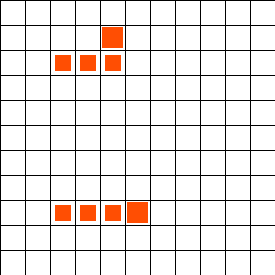

In [23]:
sample_game_state = {"game": {"id": "d76a05f5-e961-4523-807f-2d5e5825cd95", "ruleset": {"name": "standard", "version": "cli", "settings": {"foodSpawnChance": 15, "minimumFood": 1, "hazardDamagePerTurn": 14, "hazardMap": "", "hazardMapAuthor": "", "royale": {"shrinkEveryNTurns": 25}, "squad": {"allowBodyCollisions": False, "sharedElimination": False, "sharedHealth": False, "sharedLength": False}}}, "map": "standard", "timeout": 500, "source": ""}, "turn": 7, "board": {"height": 11, "width": 11, "snakes": [{"id": "f5397cbd-611f-47bc-96fd-7ca72e543bef", "name": "Team 1 Snake 1", "latency": "8", "health": 100, "body": [{"x": 4, "y": 1}, {"x": 4, "y": 2}, {"x": 3, "y": 2}, {"x": 2, "y": 2}], "head": {"x": 4, "y": 1}, "length": 4, "shout": "", "squad": "", "customizations": {"color": "#ff4e03", "head": "default", "tail": "default"}}, {"id": "8e15dfcc-fe37-4484-a946-62ff1430f6ac", "name": "Team 1 Snake 2", "latency": "8", "health": 95, "body": [{"x": 5, "y": 8}, {"x": 4, "y": 8}, {"x": 3, "y": 8}, {"x": 2, "y": 8}], "head": {"x": 5, "y": 8}, "length": 4, "shout": "", "squad": "", "customizations": {"color": "#ff4e03", "head": "default", "tail": "default"}}], "food": [{"x": 5, "y": 5}, {"x": 10, "y": 10}], "hazards": []}, "you": {"id": "f5397cbd-611f-47bc-96fd-7ca72e543bef", "name": "Team 1 Snake 1", "latency": "0", "health": 100, "body": [{"x": 4, "y": 1}, {"x": 4, "y": 2}, {"x": 3, "y": 2}, {"x": 2, "y": 2}, {"x": 2, "y": 2}], "head": {"x": 4, "y": 1}, "length": 5, "shout": "", "squad": "", "customizations": {"color": "#ff4e03", "head": "default", "tail": "default"}}}
board = GeneralBoard(11, 11)
snake1 = Snake(sample_game_state["board"]["snakes"][0]["id"])
snake2 = Snake(sample_game_state["board"]["snakes"][1]["id"])
snake1.place_on_board(board)
snake2.place_on_board(board)
snake1.update_state(sample_game_state["board"]["snakes"][0])
snake2.update_state(sample_game_state["board"]["snakes"][1])

board

In [90]:
board.is_safe(-1, 10)

False

In [80]:
import time
start = time.time()
snake1.alternative_futures("up")
end = time.time()
# print time in ms
print((end - start) * 1000)


1.909017562866211


In [24]:
%prun snake1.alternative_futures("up")

         38134 function calls (38123 primitive calls) in 0.010 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     3993    0.003    0.000    0.004    0.000 board.py:9(__init__)
     2662    0.002    0.000    0.006    0.000 board.py:62(copy)
     9427    0.001    0.000    0.001    0.000 board.py:25(set_snake)
     2673    0.001    0.000    0.001    0.000 board.py:48(clear_snake_info)
       11    0.001    0.000    0.002    0.000 board.py:116(create_cells)
     6655    0.001    0.000    0.001    0.000 board.py:19(set_food)
     6655    0.000    0.000    0.000    0.000 board.py:22(set_hazard)
       11    0.000    0.000    0.004    0.000 board.py:207(<listcomp>)
     2673    0.000    0.000    0.000    0.000 board.py:32(set_closest_snakes)
       11    0.000    0.000    0.000    0.000 snake.py:48(move)
     2832    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
       22    0.000    0.000    0.000    0.00

In [25]:
future = snake1.alternative_futures("right")

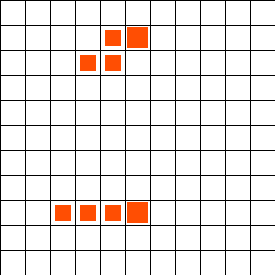

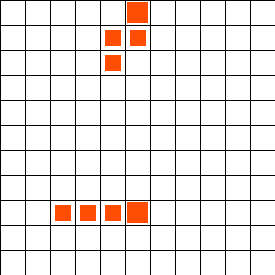

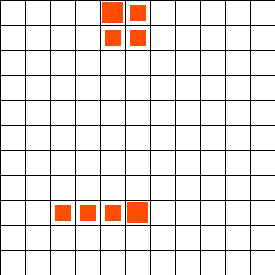

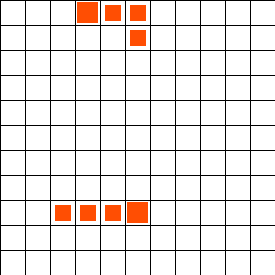

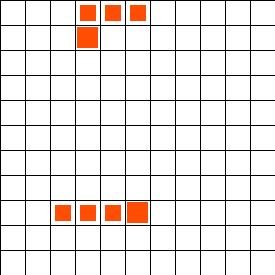

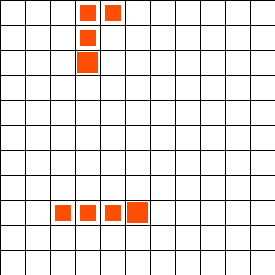

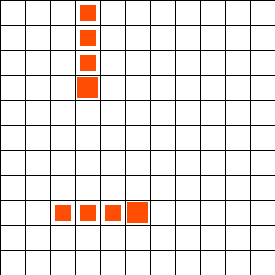

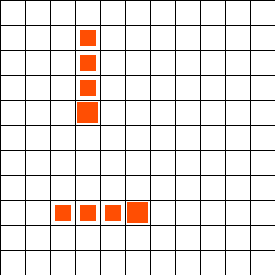

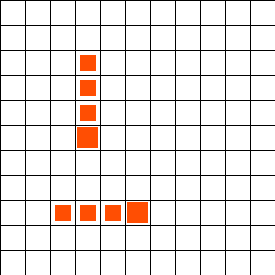

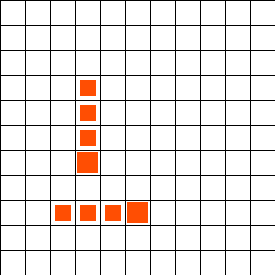

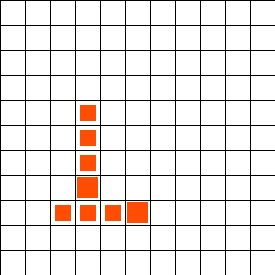

[None, None, None, None, None, None, None, None, None, None, None]

In [26]:
[f._repr_png_() for f in future]

In [27]:
def benchmark():
    import time
    start = time.time()
    subboards = board.get_possible_subboards()
    for subboard in subboards:
        next_subboards = subboard.get_possible_subboards()
        for next_subboard in next_subboards:
            next_subboard.get_possible_subboards()
    end = time.time()
    duration_ms = (end - start) * 1000
    print(duration_ms)

In [28]:
%prun benchmark()

1429.4700622558594
 

         5379658 function calls in 1.385 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   560835    0.447    0.000    0.585    0.000 board.py:9(__init__)
   373890    0.300    0.000    0.832    0.000 board.py:62(copy)
  1340855    0.133    0.000    0.133    0.000 board.py:25(set_snake)
   379578    0.117    0.000    0.188    0.000 board.py:48(clear_snake_info)
     1545    0.089    0.000    0.246    0.000 board.py:116(create_cells)
   934725    0.066    0.000    0.066    0.000 board.py:19(set_food)
   934725    0.066    0.000    0.066    0.000 board.py:22(set_hazard)
     1545    0.042    0.000    0.502    0.000 board.py:207(<listcomp>)
   379578    0.034    0.000    0.034    0.000 board.py:32(set_closest_snakes)
     8466    0.031    0.000    0.031    0.000 board.py:143(clear_snake)
   395520    0.015    0.000    0.015    0.000 {method 'append' of 'list' objects}
     1545    0.008    0.000    1.390    0.001 board.py:202